# Figure 1C for the metapredict V3 manuscript 2024

In [1]:
import os
import metapredict as meta
import numpy as np
import matplotlib
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import roc_auc_score, average_precision_score, f1_score, precision_recall_curve
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'
# set fonts
font = {'family' : 'arial',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)

# set colors for plots here. Colors are for V1, v2, and v3. Chosen because Ryan can differentiate them.
v1color='#FF9D33'
v2color='#FF6433'
v3color='#CC2D46'
hybridcolor='black'
pLDDT_color='blue'


/Users/ryanemenecker/miniconda3/envs/test_metapredict/lib/python3.9/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


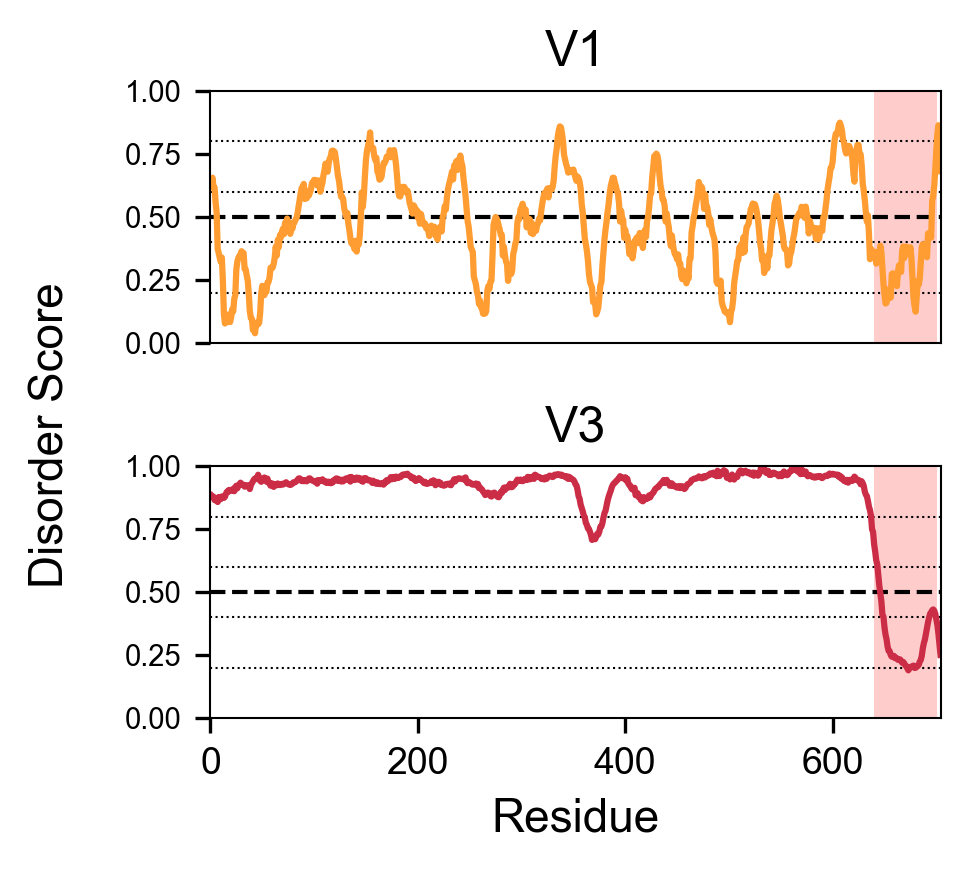

In [5]:
# Figure 1C
msn2='MTVDHDFNSEDILFPIESMSSIQYVENNNPNNINNDVIPYSLDIKNTVLDSADLNDIQNQETSLNLGLPPLSFDSPLPVTETIPSTTDNSLHLKADSNKNRDARTIENDSEIKSTNNASGSGANQYTTLTSPYPMNDILYNMNNPLQSPSPSSVPQNPTINPPINTASNETNLSPQTSNGNETLISPRAQQHTSIKDNRLSLPNGANSNLFIDTNPNNLNEKLRNQLNSDTNSYSNSISNSNSNSTGNLNSSYFNSLNIDSMLDDYVSSDLLLNDDDDDTNLSRRRFSDVITNQFPSMTNSRNSISHSLDLWNHPKINPSNRNTNLNITTNSTSSSNASPNTTTMNANADSNIAGNPKNNDATIDNELTQILNEYNMNFNDNLGTSTSGKNKSACPSSFDANAMTKINPSQQLQQQLNRVQHKQLTSSHNNSSTNMKSFNSDLYSRRQRASLPIIDDSLSYDLVNKQDEDPKNDMLPNSNLSSSQQFIKPSMILSDNASVIAKVATTGLSNDMPFLTEEGEQNANSTPNFDLSITQMNMAPLSPASSSSTSLATNHFYHHFPQQGHHTMNSKIGSSLRRRKSAVPLMGTVPLTNQQNNISSSSVNSTGNGAGVTKERRPSYRRKSMTPSRRSSVVIESTKELEEKPFHCHICPKSFKRSEHLKRHVRSVHSNERPFACHICDKKFSRSDNLSQHIKTHKKHGDI'
# dont require running prediction to make plot
run_predictions=False
if run_predictions==True:
    V1_scores=meta.predict_disorder(msn2, version=1)
    V3_scores=meta.predict_disorder(msn2, version=3)
else:
    V1_scores=[0.6348, 0.656, 0.6153, 0.6179, 0.5579, 0.5185, 0.3734, 0.3571, 0.3378, 0.3219, 0.3394, 0.2482, 0.1157, 0.0777, 0.0884, 0.0831, 0.1132, 0.0982, 0.0833, 0.1035, 0.1338, 0.1255, 0.1758, 0.1902, 0.2928, 0.3239, 0.3387, 0.3464, 0.3512, 0.3645, 0.3536, 0.3574, 0.2941, 0.2927, 0.2684, 0.2488, 0.1946, 0.126, 0.0996, 0.0963, 0.0516, 0.0622, 0.039, 0.0778, 0.0825, 0.0741, 0.0801, 0.122, 0.1979, 0.2271, 0.1928, 0.1901, 0.204, 0.2035, 0.2397, 0.2419, 0.259, 0.299, 0.2989, 0.299, 0.3132, 0.3384, 0.3828, 0.3471, 0.4094, 0.3811, 0.4281, 0.419, 0.4431, 0.4543, 0.4323, 0.4774, 0.4725, 0.4938, 0.4654, 0.4784, 0.4334, 0.4746, 0.4531, 0.4745, 0.4784, 0.4889, 0.496, 0.5145, 0.5407, 0.5688, 0.5931, 0.616, 0.6152, 0.6314, 0.5718, 0.6057, 0.5745, 0.5904, 0.5856, 0.598, 0.6119, 0.6355, 0.6342, 0.6476, 0.6409, 0.6458, 0.6249, 0.6359, 0.6453, 0.6002, 0.6203, 0.6353, 0.6658, 0.6863, 0.712, 0.6912, 0.6796, 0.7122, 0.732, 0.7378, 0.7617, 0.7639, 0.7617, 0.7571, 0.7305, 0.6954, 0.6628, 0.6438, 0.609, 0.5798, 0.5808, 0.5718, 0.5347, 0.5168, 0.5011, 0.5163, 0.474, 0.448, 0.4156, 0.3956, 0.3925, 0.386, 0.3721, 0.4057, 0.3629, 0.4043, 0.3906, 0.4253, 0.4975, 0.598, 0.54, 0.5889, 0.6635, 0.7282, 0.7632, 0.783, 0.8003, 0.8357, 0.7728, 0.7774, 0.7732, 0.7402, 0.7258, 0.7356, 0.6812, 0.6704, 0.6481, 0.652, 0.6597, 0.6899, 0.7143, 0.7142, 0.7227, 0.7395, 0.7422, 0.7407, 0.7648, 0.7371, 0.7558, 0.7635, 0.7656, 0.7409, 0.7074, 0.6592, 0.6055, 0.5833, 0.5812, 0.5987, 0.6198, 0.6189, 0.6195, 0.6064, 0.597, 0.6047, 0.5878, 0.5577, 0.5439, 0.5294, 0.5136, 0.5466, 0.5397, 0.522, 0.5276, 0.4969, 0.5169, 0.4736, 0.5124, 0.4856, 0.4827, 0.4695, 0.4742, 0.4554, 0.4572, 0.4497, 0.4245, 0.4619, 0.4659, 0.4515, 0.4461, 0.4614, 0.4266, 0.4254, 0.4104, 0.4531, 0.4578, 0.4633, 0.4429, 0.4997, 0.5137, 0.5434, 0.5291, 0.5751, 0.6084, 0.628, 0.6441, 0.6611, 0.6804, 0.6488, 0.7043, 0.7026, 0.7209, 0.6865, 0.7256, 0.7268, 0.744, 0.7175, 0.7021, 0.6546, 0.618, 0.5841, 0.5357, 0.4837, 0.4624, 0.42, 0.3813, 0.371, 0.3614, 0.2629, 0.249, 0.2335, 0.203, 0.1875, 0.1545, 0.1688, 0.1419, 0.134, 0.1161, 0.1285, 0.1173, 0.1277, 0.2082, 0.2262, 0.2143, 0.2437, 0.248, 0.3457, 0.4686, 0.486, 0.5001, 0.4944, 0.482, 0.4649, 0.45, 0.4289, 0.4294, 0.3471, 0.3825, 0.3484, 0.3238, 0.3142, 0.2467, 0.2864, 0.3022, 0.2739, 0.2892, 0.3537, 0.37, 0.395, 0.4066, 0.4776, 0.4998, 0.4927, 0.5327, 0.5384, 0.5529, 0.5342, 0.5265, 0.5293, 0.4591, 0.4948, 0.4771, 0.491, 0.4368, 0.4762, 0.4323, 0.4488, 0.4447, 0.4454, 0.4673, 0.4765, 0.4942, 0.4869, 0.5254, 0.5529, 0.5769, 0.5949, 0.5991, 0.6027, 0.6133, 0.5778, 0.6142, 0.6124, 0.6088, 0.6191, 0.6446, 0.7014, 0.744, 0.774, 0.8201, 0.8454, 0.8596, 0.8561, 0.8327, 0.8001, 0.7469, 0.7271, 0.7092, 0.6968, 0.6762, 0.6872, 0.6786, 0.681, 0.68, 0.6884, 0.6716, 0.6557, 0.6435, 0.6608, 0.6538, 0.64, 0.6139, 0.5527, 0.5191, 0.4646, 0.415, 0.3932, 0.3662, 0.3285, 0.2739, 0.2429, 0.2316, 0.2191, 0.1626, 0.1707, 0.1551, 0.1139, 0.1259, 0.1399, 0.182, 0.2279, 0.2413, 0.3079, 0.3583, 0.4122, 0.4508, 0.4828, 0.5211, 0.5516, 0.5931, 0.622, 0.6387, 0.6558, 0.6559, 0.6353, 0.6227, 0.6038, 0.5939, 0.5559, 0.4823, 0.525, 0.4967, 0.489, 0.4175, 0.45, 0.4158, 0.4255, 0.3965, 0.3526, 0.3646, 0.3534, 0.3362, 0.3635, 0.4049, 0.4099, 0.4181, 0.4216, 0.3962, 0.4367, 0.4318, 0.4303, 0.3772, 0.433, 0.4489, 0.4207, 0.4826, 0.4998, 0.5389, 0.5888, 0.594, 0.6573, 0.6973, 0.7422, 0.7447, 0.7514, 0.7442, 0.7207, 0.6661, 0.6266, 0.6038, 0.5706, 0.5677, 0.5441, 0.4818, 0.5141, 0.4829, 0.4598, 0.4128, 0.3847, 0.4267, 0.3899, 0.3657, 0.3514, 0.347, 0.3321, 0.3516, 0.3132, 0.3165, 0.2659, 0.2533, 0.2879, 0.27, 0.276, 0.237, 0.2831, 0.2556, 0.3349, 0.3352, 0.4398, 0.4648, 0.4989, 0.5158, 0.5459, 0.5687, 0.5943, 0.639, 0.6058, 0.6226, 0.6176, 0.5882, 0.5326, 0.5895, 0.5465, 0.5415, 0.5146, 0.4685, 0.4917, 0.4628, 0.4401, 0.4262, 0.4113, 0.3612, 0.2452, 0.2349, 0.2447, 0.2374, 0.2479, 0.1671, 0.1484, 0.1374, 0.1247, 0.1247, 0.1177, 0.1216, 0.119, 0.0828, 0.1228, 0.1361, 0.1691, 0.2362, 0.2668, 0.2935, 0.3258, 0.3297, 0.379, 0.379, 0.3931, 0.3572, 0.4201, 0.3614, 0.4262, 0.4601, 0.4658, 0.4757, 0.5035, 0.5307, 0.5401, 0.5538, 0.5422, 0.5508, 0.5377, 0.5164, 0.4889, 0.4472, 0.3986, 0.375, 0.3275, 0.3449, 0.2781, 0.3212, 0.3286, 0.2959, 0.349, 0.3477, 0.3962, 0.4486, 0.4775, 0.5049, 0.5545, 0.5667, 0.5845, 0.5703, 0.5399, 0.501, 0.4758, 0.4502, 0.4255, 0.3838, 0.3724, 0.3716, 0.3637, 0.308, 0.3139, 0.3486, 0.3604, 0.3837, 0.4146, 0.4349, 0.463, 0.4936, 0.5009, 0.5093, 0.5172, 0.5065, 0.5408, 0.5338, 0.5205, 0.4967, 0.5414, 0.5154, 0.4898, 0.4348, 0.4849, 0.469, 0.4558, 0.4498, 0.4571, 0.4398, 0.4123, 0.4557, 0.4113, 0.4149, 0.448, 0.4572, 0.4449, 0.4995, 0.4973, 0.5319, 0.5628, 0.6063, 0.6345, 0.6589, 0.6944, 0.6973, 0.7204, 0.7706, 0.808, 0.8308, 0.8276, 0.8416, 0.8661, 0.8744, 0.8611, 0.8431, 0.8066, 0.796, 0.7672, 0.7522, 0.7637, 0.7813, 0.7819, 0.7685, 0.7532, 0.7325, 0.6731, 0.6404, 0.7517, 0.7673, 0.7868, 0.786, 0.7436, 0.7491, 0.7063, 0.6332, 0.6057, 0.5677, 0.5193, 0.4815, 0.507, 0.4333, 0.3328, 0.3743, 0.3644, 0.3475, 0.3552, 0.362, 0.3151, 0.3197, 0.3302, 0.3414, 0.3861, 0.3602, 0.3001, 0.2352, 0.1923, 0.157, 0.1599, 0.2123, 0.1771, 0.1992, 0.1802, 0.2735, 0.2769, 0.2726, 0.2626, 0.2744, 0.226, 0.285, 0.3084, 0.3101, 0.2823, 0.3657, 0.3831, 0.3375, 0.3791, 0.383, 0.366, 0.3549, 0.3582, 0.38, 0.3344, 0.2525, 0.1774, 0.1463, 0.1244, 0.1806, 0.2464, 0.232, 0.2565, 0.3177, 0.383, 0.3926, 0.382, 0.3614, 0.3631, 0.3406, 0.4351, 0.4326, 0.437, 0.4183, 0.5647, 0.5849, 0.6257, 0.6929, 0.7681, 0.8305, 0.8642, 0.8473, 0.6818]
    V3_scores=[0.883, 0.8781, 0.8786, 0.8653, 0.8642, 0.8636, 0.8575, 0.8773, 0.8698, 0.8691, 0.8796, 0.8757, 0.8738, 0.8779, 0.891, 0.8986, 0.8972, 0.9056, 0.901, 0.9028, 0.9051, 0.9101, 0.9003, 0.9165, 0.9223, 0.912, 0.9223, 0.9266, 0.9341, 0.9299, 0.9267, 0.9255, 0.9184, 0.9245, 0.9233, 0.9236, 0.9166, 0.909, 0.9248, 0.9322, 0.9405, 0.9467, 0.9509, 0.9524, 0.9486, 0.9656, 0.953, 0.9413, 0.9377, 0.9453, 0.9503, 0.9547, 0.9475, 0.9383, 0.9503, 0.9347, 0.9315, 0.9222, 0.9318, 0.9303, 0.9175, 0.9283, 0.9245, 0.9241, 0.931, 0.9273, 0.9247, 0.9279, 0.9297, 0.9266, 0.9306, 0.932, 0.9359, 0.9311, 0.9283, 0.9264, 0.9252, 0.9266, 0.9311, 0.9356, 0.935, 0.9367, 0.9402, 0.9458, 0.9507, 0.9514, 0.9476, 0.9405, 0.9437, 0.94, 0.9437, 0.9407, 0.9396, 0.9459, 0.9512, 0.9511, 0.9459, 0.9428, 0.9419, 0.9393, 0.9369, 0.9417, 0.9301, 0.9445, 0.9401, 0.9422, 0.9426, 0.9474, 0.9401, 0.9378, 0.9399, 0.9331, 0.9346, 0.9382, 0.9344, 0.9319, 0.9387, 0.9351, 0.9436, 0.9448, 0.9506, 0.9509, 0.9408, 0.9472, 0.9447, 0.9389, 0.946, 0.9393, 0.944, 0.9487, 0.9514, 0.9475, 0.9445, 0.9556, 0.9385, 0.9568, 0.9513, 0.949, 0.9445, 0.9508, 0.9544, 0.9469, 0.9532, 0.9523, 0.9429, 0.9431, 0.9378, 0.9517, 0.9457, 0.9517, 0.9454, 0.9434, 0.9449, 0.9436, 0.941, 0.9334, 0.9419, 0.9325, 0.9357, 0.9297, 0.9354, 0.9314, 0.9291, 0.9282, 0.9318, 0.9331, 0.9263, 0.9356, 0.9354, 0.9444, 0.9399, 0.9439, 0.9491, 0.9563, 0.9478, 0.9513, 0.957, 0.9496, 0.9582, 0.954, 0.9526, 0.9577, 0.9564, 0.9583, 0.965, 0.9669, 0.9664, 0.9675, 0.9655, 0.9697, 0.9638, 0.9607, 0.9605, 0.9516, 0.954, 0.954, 0.9452, 0.9409, 0.9477, 0.9449, 0.9522, 0.9492, 0.9453, 0.9408, 0.9376, 0.9325, 0.9377, 0.93, 0.9323, 0.9309, 0.9323, 0.9329, 0.9397, 0.9354, 0.9435, 0.9404, 0.9241, 0.9373, 0.9289, 0.9377, 0.9279, 0.9333, 0.925, 0.9248, 0.9223, 0.9235, 0.9283, 0.9288, 0.9298, 0.9268, 0.9307, 0.924, 0.9333, 0.9391, 0.9474, 0.9389, 0.9476, 0.9483, 0.9514, 0.9513, 0.9503, 0.9491, 0.948, 0.9474, 0.9528, 0.955, 0.9378, 0.9322, 0.9377, 0.9332, 0.9328, 0.9282, 0.9263, 0.9279, 0.9282, 0.931, 0.9222, 0.9291, 0.9124, 0.9154, 0.9101, 0.9067, 0.8978, 0.8944, 0.8851, 0.888, 0.8945, 0.8944, 0.8929, 0.8812, 0.8791, 0.8871, 0.8941, 0.8944, 0.8854, 0.8815, 0.8775, 0.8764, 0.8846, 0.8973, 0.8934, 0.9063, 0.9144, 0.9049, 0.9155, 0.9141, 0.9144, 0.9229, 0.9298, 0.9164, 0.917, 0.9212, 0.9295, 0.9301, 0.9388, 0.9462, 0.9416, 0.941, 0.9465, 0.9437, 0.9401, 0.9423, 0.9487, 0.9477, 0.9445, 0.9574, 0.9558, 0.9472, 0.954, 0.9574, 0.9507, 0.9492, 0.9658, 0.9632, 0.9586, 0.9573, 0.9572, 0.9546, 0.9494, 0.9516, 0.9485, 0.9469, 0.9554, 0.949, 0.9531, 0.9575, 0.9619, 0.9606, 0.9612, 0.9565, 0.959, 0.9661, 0.9644, 0.9643, 0.968, 0.9663, 0.9667, 0.962, 0.9656, 0.9613, 0.9594, 0.96, 0.955, 0.9592, 0.9493, 0.9573, 0.9515, 0.9511, 0.9476, 0.9454, 0.9386, 0.9281, 0.9231, 0.9056, 0.8812, 0.8703, 0.8471, 0.8341, 0.8206, 0.8044, 0.7972, 0.7745, 0.7672, 0.7529, 0.7502, 0.7392, 0.7263, 0.707, 0.7188, 0.7161, 0.7098, 0.7193, 0.7314, 0.7286, 0.7399, 0.7592, 0.7603, 0.7741, 0.7961, 0.8138, 0.8228, 0.8422, 0.863, 0.8783, 0.8909, 0.9019, 0.916, 0.925, 0.9312, 0.9337, 0.9399, 0.9422, 0.9487, 0.9514, 0.96, 0.9524, 0.9551, 0.9511, 0.9523, 0.9556, 0.9422, 0.9497, 0.9306, 0.9244, 0.9221, 0.9108, 0.9068, 0.9111, 0.9138, 0.8844, 0.892, 0.8923, 0.8765, 0.8802, 0.8659, 0.8626, 0.8604, 0.8768, 0.8677, 0.8722, 0.8703, 0.8748, 0.8838, 0.8758, 0.8842, 0.8909, 0.8942, 0.902, 0.9092, 0.9129, 0.9162, 0.9171, 0.9248, 0.9282, 0.9338, 0.9336, 0.9444, 0.935, 0.9328, 0.9453, 0.9336, 0.9344, 0.922, 0.9306, 0.9314, 0.9207, 0.9234, 0.9196, 0.9163, 0.9145, 0.9198, 0.9206, 0.9129, 0.9142, 0.9203, 0.917, 0.909, 0.9131, 0.921, 0.9278, 0.9297, 0.9324, 0.9367, 0.9445, 0.9459, 0.9492, 0.9505, 0.9498, 0.9521, 0.953, 0.959, 0.9568, 0.9552, 0.9514, 0.9576, 0.96, 0.9549, 0.959, 0.9614, 0.9644, 0.9639, 0.9708, 0.9691, 0.968, 0.974, 0.9648, 0.9665, 0.9599, 0.9815, 0.961, 0.9607, 0.976, 0.97, 0.9694, 0.9835, 0.9782, 0.9782, 0.9534, 0.9567, 0.9576, 0.9471, 0.9594, 0.9665, 0.9587, 0.9466, 0.9554, 0.9566, 0.9566, 0.969, 0.9776, 0.9824, 0.9813, 0.9712, 0.9757, 0.9766, 0.9814, 0.9759, 0.9719, 0.9762, 0.9738, 0.967, 0.9681, 0.9744, 0.9617, 0.9737, 0.9662, 0.97, 0.962, 0.9665, 0.9779, 0.9937, 0.9855, 0.9938, 0.9794, 0.9848, 0.9728, 0.9748, 0.9809, 0.9647, 0.9706, 0.9657, 0.9695, 0.9741, 0.9724, 0.9694, 0.9687, 0.9641, 0.9597, 0.9638, 0.9693, 0.96, 0.9701, 0.9785, 0.9691, 0.9655, 0.9638, 0.9665, 0.9765, 0.9786, 0.9795, 0.9946, 0.9992, 0.9867, 0.9936, 0.9909, 0.979, 0.9791, 0.9756, 0.9681, 0.9881, 0.9687, 0.9696, 0.972, 0.9784, 0.9667, 0.9597, 0.964, 0.9644, 0.9605, 0.9581, 0.9582, 0.9546, 0.9584, 0.9549, 0.9586, 0.9602, 0.959, 0.9602, 0.9538, 0.9524, 0.9563, 0.9592, 0.962, 0.9606, 0.9609, 0.9649, 0.9703, 0.9662, 0.9678, 0.9694, 0.9665, 0.9665, 0.9665, 0.964, 0.9659, 0.9572, 0.9619, 0.9511, 0.9555, 0.9468, 0.9412, 0.9416, 0.9374, 0.9454, 0.9343, 0.9443, 0.9457, 0.9454, 0.9412, 0.9446, 0.9582, 0.9537, 0.9469, 0.9448, 0.9398, 0.943, 0.9278, 0.9396, 0.9324, 0.9214, 0.8987, 0.8869, 0.881, 0.8618, 0.8394, 0.825, 0.8027, 0.7496, 0.7383, 0.6897, 0.6616, 0.6268, 0.6106, 0.5673, 0.5257, 0.494, 0.4633, 0.4096, 0.4021, 0.3599, 0.3313, 0.3126, 0.2832, 0.267, 0.2656, 0.2507, 0.2438, 0.244, 0.2472, 0.2382, 0.2399, 0.2367, 0.2315, 0.2305, 0.2333, 0.2272, 0.2201, 0.2233, 0.2177, 0.2098, 0.2068, 0.1984, 0.1898, 0.1971, 0.2031, 0.2039, 0.2066, 0.2086, 0.1993, 0.1997, 0.2051, 0.2065, 0.212, 0.2241, 0.2311, 0.2487, 0.2779, 0.2983, 0.3127, 0.3358, 0.3601, 0.3808, 0.3994, 0.4142, 0.4203, 0.428, 0.4313, 0.4258, 0.4136, 0.3925, 0.3697, 0.3351, 0.2932, 0.2509]
xaxnums=[a+1 for a in range(0, len(msn2))]

# make fig
fig, [ax1, ax3] = plt.subplots(ncols=1, nrows=2, figsize=(3.25, 3), dpi=150, facecolor='w', edgecolor='k', layout='tight')
ax1.plot(xaxnums, V1_scores, color=v1color, label='V1', linewidth=1.5)
ax3.plot(xaxnums, V3_scores, color=v3color, label='V3', linewidth=1.5)

# stuff for all 3 axes
allax=[ax1,ax3]
for num, a in enumerate(allax):
    a.set_ylim(0,1)
    for i in ([0.2, 0.4, 0.6, 0.8]):
        a.axhline(i, linestyle='dotted', color='black', linewidth=0.5, zorder=1)
    a.axhline(0.5, linestyle='dashed', color='black', linewidth=1, zorder=1)
    # change the fontsize
    a.tick_params(axis='y', labelsize=7)
    a.set_xlim(0, len(msn2))
    a.axvspan(640, 701, alpha=0.2, color='red', linewidth=0, zorder=0)

ax1.set_title('V1')
ax3.set_title('V3')

# additional changes. 
ax1.set_xticks([])
ax3.set_xlabel('Residue', fontsize=11)
ax3.tick_params('x', labelsize=9)
fig.supylabel('Disorder Score', fontsize=11)
plt.tight_layout()

# save
plt.savefig('Figure_1C_disorder_plots.pdf')
